In [15]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import meteva.method as mem
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


***通过随机函数生成测试数据，用于后续检验函数调用示例***

In [2]:
ob_p = np.random.rand(10,1000)             
ob= np.zeros(ob_p.shape)     
ob[ob_p>0.5] = 1                           #设定有一部分观测被确定为正例（1），一部分被确定为负例（0）
error1 = np.abs(np.random.randn(5,10,1000)) * 0.3  #在观测的基础上加上一个概率扰动构建概率预报
error0 = np.abs(np.random.randn(5,10,1000)) * 0.3
error1[error1>1] = 1
error0[error0>1] = 1
fo = np.zeros((5,10,1000)) + ob
fo[fo==1] = 1 - error1[fo==1]             #对于观测正例，概率预报在1左右
fo[fo==0] = error0[fo ==0]                #对于观测负例，概率预报在0左右

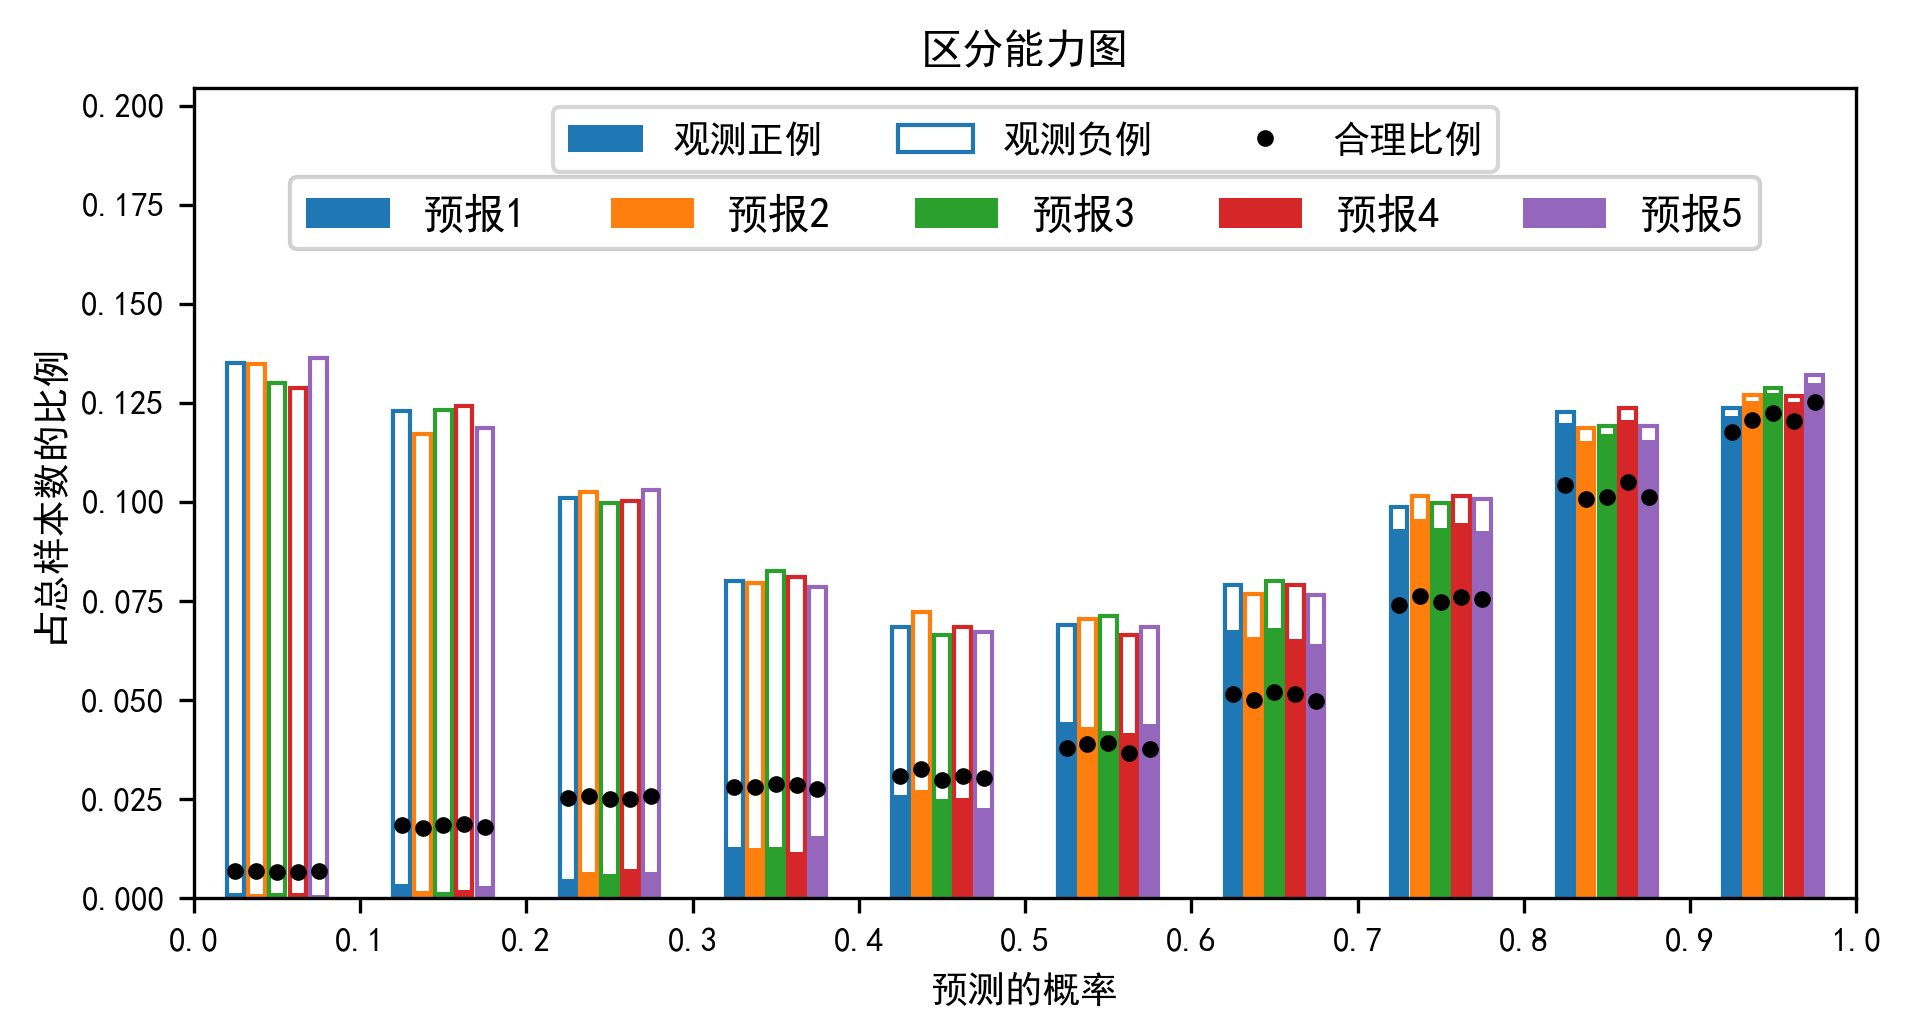

In [3]:
mem.discrimination(ob,fo)  #显示不同概率预报位于不同区间时观测的正例和负例数统计结果

**<font face="黑体" color=blue size = 5>bs评分</font>**        
**bs(ob, fo)**  
计算brier_score 评分
  
|参数|说明|    
|:--|:--|  
|**<font face="黑体" color=blue size = 5>ob</font>**|实况数据, 任意维numpy数组,元素取值必须为0或者1|   
|**<font face="黑体" color=blue size = 5>fo</font>**| fo比Ob.shape多一维或者保持一致，fo.shape低维与ob.shape保持一致,元素取值必须在区间[0,1]内|   
|<font face="黑体" color=blue size=5>return</font>|如果fo和ob的shape一致（即只有一种预报），返回结果为实数；如果fo比ob高出一维，则返回1维数组，长度等于预报成员数。元素0到1的实数，完美值为0|   
  
    
 **调用示例：** 

In [4]:
mem.bs(ob,fo[0,:])

0.0899065289103979

In [5]:
mem.bs(ob,fo)

array([0.08990653, 0.09012031, 0.08927165, 0.09068477, 0.09150575])

**<font face="黑体" color=blue size = 5>bss评分 </font>**       
**bss(ob, fo)**  
计算Brier skill score  评分, 它是实际预报bs相对预报随机预报bs评分的技巧。

  
|参数|说明|    
|:--|:--|  
|**<font face="黑体" color=blue size = 5>ob</font>**|实况数据, 任意维numpy数组,元素取值必须为0或者1|   
|**<font face="黑体" color=blue size = 5>fo</font>**| fo比Ob.shape多一维或者保持一致，fo.shape低维与ob.shape保持一致,元素取值必须在区间[0,1]内|   
|<font face="黑体" color=blue size=5>return</font>|如果fo和ob的shape一致（即只有一种预报），返回结果为实数；如果fo比ob高出一维，则返回1维数组，长度等于预报成员数。元素负无穷到1的实数，完美值为1|   


 **调用示例：** 

In [6]:
mem.bss(ob,fo[0,:])

0.6403334722273479

In [7]:
mem.bss(ob,fo)

array([0.64033347, 0.63947825, 0.64287328, 0.63722018, 0.63393588])

**<font face="黑体" color=blue size = 5>roc面积</font>**        
**roc_auc(ob, fo)**  
计算roc图中 roc曲线以下部分的面积。
  
  
|参数|说明|    
|:--|:--|  
|**<font face="黑体" color=blue size = 5>ob</font>**|实况数据, 任意维numpy数组,元素取值必须为0或者1|   
|**<font face="黑体" color=blue size = 5>fo</font>**| fo比Ob.shape多一维或者保持一致，fo.shape低维与ob.shape保持一致,元素取值必须在区间[0,1]内|   
|<font face="黑体" color=blue size=5>return</font>|如果fo和ob的shape一致（即只有一种预报），返回结果为实数；如果fo比ob高出一维，则返回1维数组，长度等于预报成员数。元素 0 到 1的实数，完美值为1，小于或等于0.5代表没有预报技巧| 
  

 **调用示例：** 

In [8]:
mem.roc_auc(ob,fo[0,:])

0.9629681991068517

In [9]:
mem.roc_auc(ob,fo)

array([0.9629682 , 0.96381113, 0.96494226, 0.96207502, 0.96022157])

   在以上示例中，观测和预报的数据都直接输入到评分函数中进行计算，然而有些情况下待检验的数据太大不能整体存入一个numpy数组中，或者不方便整体存入一个numpy数组中，此时就不能调用上面的方式调用评分函数。为此本程序库设计了一套可分块计算的检验程序。
其检验步骤如下：
步骤1：根据需要将分块数据逐一输入到中间结果计算函数
步骤2：将中间结果进行累加或合并
步骤3：根据累加或合并的中间结果计算检验指标
通常上述计算中步骤1是最耗费计算资源，为了提高效率步骤1也可以采用并行的方式执行。此外，步骤1执行的结果也可输出到文件中，在后续的检验可以从中读入部分中间结果执行后续步骤，从而可以实现各种方式的分组检验，大大提高检验计算效率。  
   另外，在预报检验经常需要进行分组检验，获得不同类别预报的评分指标并进行对比。此时可以应用上述基于中间结果的检验函数对多维中间统计量的整体计算能力来简化代码的复杂度。

**<font face="黑体" color=blue size = 5>总样本数、误差总和、观测平均、观测方差</font>**        
**tems(ob, fo)**  
用来计算bs,bss等检验指标的中间量   
    

|参数|说明|    
|:--|:--|  
|**<font face="黑体" color=blue size = 5>ob</font>**|实况数据, 任意维numpy数组,元素取值必须为0或者1|   
|**<font face="黑体" color=blue size = 5>fo</font>**| fo比Ob.shape多一维或者保持一致，fo.shape低维与ob.shape保持一致,元素取值必须在区间[0,1]内|   
|<font face="黑体" color=blue size=5>return</font>|如果fo和ob的shape一致（即只有一种预报），返回结果为一维数组，长度为4,；如果fo比ob高出一维，则返回2维数组，shape= （预报成员数，4），最后一维内容依次为总样本数、误差总和、观测的平均值、观测的方差| 




**<font face="黑体" color=blue size = 5>tems合并函数</font>**        
**tems_merge(tems_array0,tems_array1)**  
用来将tems计算得到的分块中间统计量进行合并，得到两块数据并集对应的统计量  
    
    
|参数|说明|    
|:--|:--|  
|**<font face="黑体" color=blue size = 5>tems_array0</font>**|最后一维长度为4的多维数组，分别记录了（总样本数、误差总和、观测的平均值、观测的方差）|   
|**<font face="黑体" color=blue size = 5>tems_array1</font>**| 形式和含义同tems_array0|   
|<font face="黑体" color=blue size=5>return</font>|形式和含义同tems_array0| 
    

   
**调用示例**  

In [10]:
model_count = 5
day_count = 10
tems_array = np.zeros((model_count,4)) 
grade_count = 10
hnh_array = np.zeros((model_count,grade_count,2))
for i in range(day_count):
    ob1 = ob[i,:]
    fo1 = fo[:,i,:]
    hnh_array += mem.hnh(ob1,fo1,grade_count) #计算并累加区分能力表，函数见probablility.plot.hnh模块
    tems1 = mem.tems(ob1,fo1)
    tems_array= mem.tems_merge(tems_array,tems1)

**<font face="黑体" color=blue size = 5>bs评分</font>**        
**bs_tems(tems_array)**  
计算brier_score 评分
   

|参数|说明|    
|:--|:--|  
|**<font face="黑体" color=blue size = 5>tems_array</font>**|最后一维长度为4的多维数组，分别记录了（总样本数、误差总和、观测的平均值、观测的方差）,它通常是tems函数的返回结果或结果的累加|   
|<font face="黑体" color=blue size=5>return</font>|整数或数组，它比tase_array少了最后一维。 其中每个元素为 0到1的实数，完美值为0| 
    
    
 **调用示例：** 

In [11]:
mem.bs_tems(tems_array)

array([0.08990653, 0.09012031, 0.08927165, 0.09068477, 0.09150575])

### bss评分   
**bss_tems(tems_array)**  
计算Brier skill score  评分, 它是实际预报bs相对预报随机预报bs评分的技巧。  

|参数|说明|    
|:--|:--|  
|**<font face="黑体" color=blue size = 5>tems_array</font>**|最后一维长度为4的多维数组，分别记录了（总样本数、误差总和、观测的平均值、观测的方差）,它通常是tems函数的返回结果或结果的累加|   
|<font face="黑体" color=blue size=5>return</font>|整数或数组，它比tase_array少了最后一维。 其中每个元素为 负无穷到1的实数，完美值为1| 
    
  
 **调用示例：** 

In [12]:
mem.bss_tems(tems_array)

array([0.64033347, 0.63947825, 0.64287328, 0.63722018, 0.63393588])

**<font face="黑体" color=blue size = 5>roc面积 </font>**       
**roc_auc_hnh(hnh_array)**  
计算roc图中 roc曲线以下部分的面积。
  
  
|参数|说明|    
|:--|:--|  
|**<font face="黑体" color=blue size = 5>hnh_array</font>**|最后两维shape为（等级数，2）的多维数组，分别记录了（预报概率在各个区间时实况正例和负例的样本数）,它通常是[hnh,区分能力表](https://www.showdoc.cc/meteva?page_id=4680093808004082)函数的返回结果或结果的累加|   
|<font face="黑体" color=blue size=5>return</font>|整数或数组，它比hnh_array少了最后2维。 其中每个元素为0 到 1的实数，完美值为1，小于或等于0.5代表没有预报技巧| 


 **调用示例：** 

In [13]:
mem.roc_auc_hnh(hnh_array)

array([0.96102854, 0.96177637, 0.96354224, 0.96021969, 0.95787775])

以上只是展示了分类检验的维度为1的情况，实际上上述思路可以扩展至任意高维的情况。熟练使用中间统计量计算和合并方法，基于中间统计量整体计算分类问题下的检验指标数组，是提高代码编写效果的关键。上述检验函数的内部也都采用了numpy的整体计算方式实现，在计算效率上进行了最大程度的优化。